In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
from sklearn.decomposition import PCA

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

### Seattle Housing

In [3]:
data = pd.read_csv(fr"C:\Users\cegom\Downloads\train.csv")

In [4]:
y = data.SalePrice
X = data.drop(columns = "SalePrice")

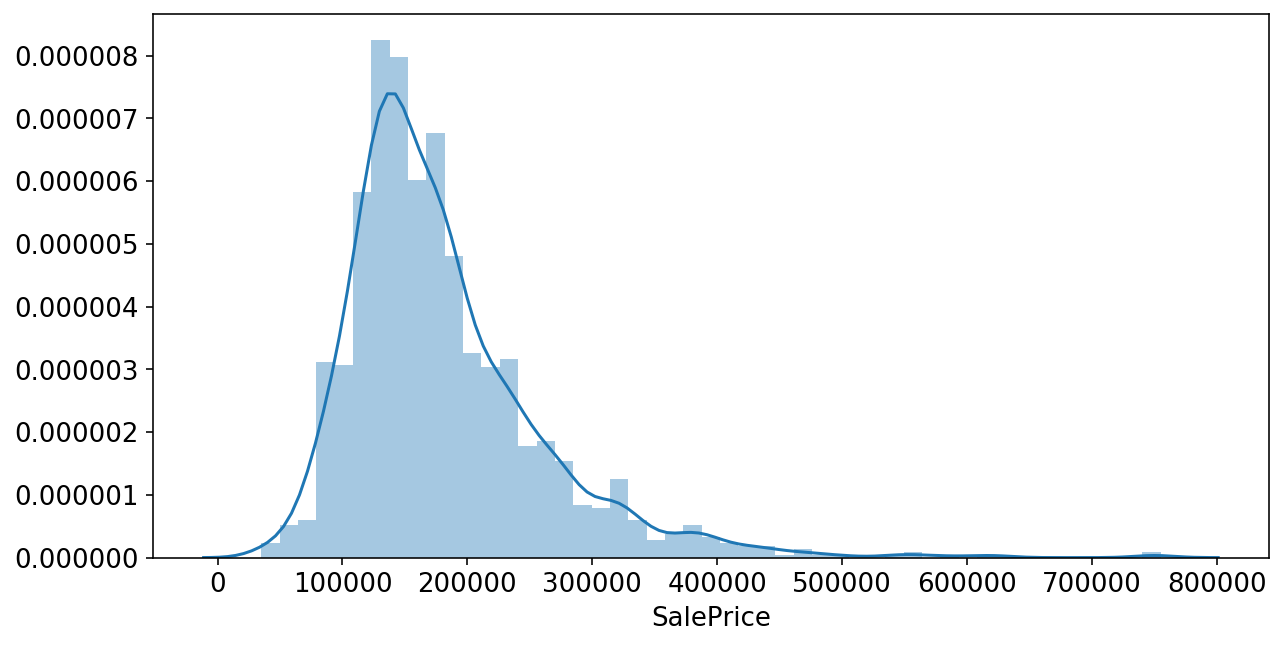

In [5]:
sns.distplot(y)
plt.show()

In [48]:
column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False),StandardScaler()), ["MSZoning", "Utilities", "LotConfig", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "KitchenQual","SaleCondition"]),
     ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)
columns_ohe = column_selector.fit_transform(X)
columns_ohe

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.22937175,
         0.51141841,  1.02115667],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.4519361 ,
        -0.57441047, -0.10448286],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.09311018,
         0.32306034,  0.93777596],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.18395123,
        -0.57441047, -1.56364521],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.09311018,
        -0.57441047, -1.18843203],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.22483348,
        -0.57441047, -0.56307674]])

In [144]:
pca = PCA(svd_solver='full')
pca.fit(columns_ohe)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

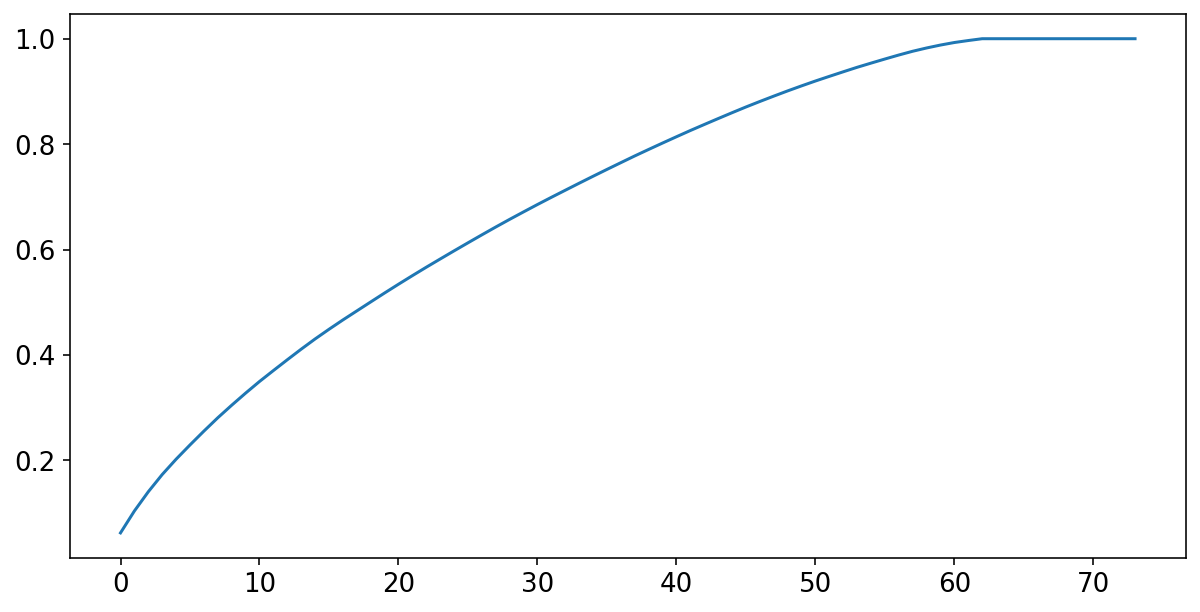

In [145]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

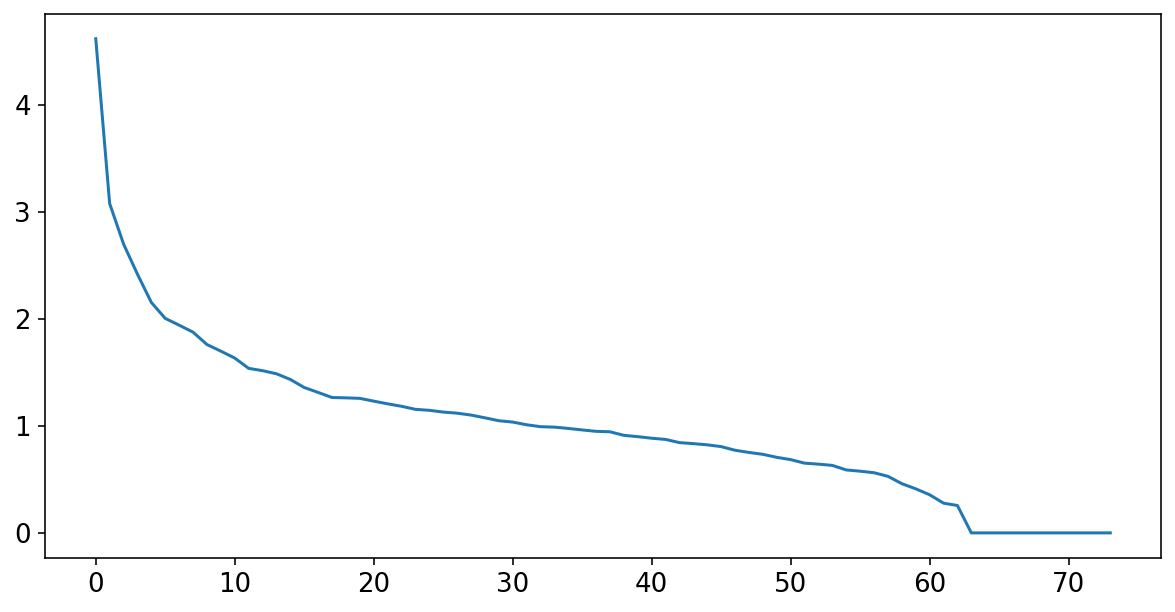

In [148]:
plt.plot(pca.explained_variance_)
plt.show()

In [53]:
columns_res = pca.transform(columns_ohe)

In [62]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_validate

In [164]:
column_selector = column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False, handle_unknown = "ignore"),StandardScaler()), ["MSZoning", "Utilities", "LotConfig", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "KitchenQual","SaleCondition"]),
     ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)

pca = PCA(n_components = 25,svd_solver='full')

pipe = Pipeline([
    ("select_cols", column_selector),
    ("pca",pca),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

In [165]:
train, test = train_test_split(data, test_size = 0.2, random_state = 2501)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [166]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.66
mean mae: 30,284.67


#### Demostración

$$
Por Demostrar: \frac{d}{dx} \sigma(x) = \sigma(x)(1 - \sigma(x)) 
$$

$$
\begin{align}
\frac{d}{dx} \sigma(x) &= \frac{d}{dx} {(1+e^{-x})}^{-1}\\
  &= {-(1+e^{-x})}^{-2}{(e^{-x})}\\
  &= \frac{e^{-x}}{{(1+e^{-x})}^{2}}\\
  &= \frac{1}{{1+e^{-x}}} \dot{} \frac{e^{-x}}{{(1+e^{-x})}} \\
  &= \frac{1}{{1+e^{-x}}} \dot{} \frac{(1+e^{-x})-1}{1+e^{-x}} \\
  &= \frac{1}{{1+e^{-x}}} \dot{} \left(\frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}}\right)\\
  &= \frac{1}{{1+e^{-x}}} \dot{} \left(1 - \frac{1}{1+e^{-x}}\right)\\
  &= \sigma(x) (1 - \sigma(x))
\end{align}
$$